# This is the world bank dataset which will be used to train the model for forecasting the population in the future given this past data for four countries being Brazil, China, USA and Denmark
# 1. Data extraction

   ### 1.1 lets start by first extracting the json data from the world bank api and convert it into a rather readable data frame using pandas

In [19]:
import requests
import pandas as pd

url = 'http://api.worldbank.org/v2/countries/br;cn;us;de/indicators/SP.POP.TOTL'
params = {"format": "json", "per_page": 1000}
r = requests.get(url, params=params)
indicators = pd.json_normalize(r.json()[1])
indicators.head(10)

,countryiso3code,date,value,unit,obs_status,decimal,indicator.id,indicator.value,country.id,country.value
0,BRA,2024,211998573,,,0,SP.POP.TOTL,"Population, total",BR,Brazil
1,BRA,2023,211140729,,,0,SP.POP.TOTL,"Population, total",BR,Brazil
2,BRA,2022,210306415,,,0,SP.POP.TOTL,"Population, total",BR,Brazil
3,BRA,2021,209550294,,,0,SP.POP.TOTL,"Population, total",BR,Brazil
4,BRA,2020,208660842,,,0,SP.POP.TOTL,"Population, total",BR,Brazil
5,BRA,2019,207455459,,,0,SP.POP.TOTL,"Population, total",BR,Brazil
6,BRA,2018,206107261,,,0,SP.POP.TOTL,"Population, total",BR,Brazil
7,BRA,2017,204703445,,,0,SP.POP.TOTL,"Population, total",BR,Brazil
8,BRA,2016,203218114,,,0,SP.POP.TOTL,"Population, total",BR,Brazil
9,BRA,2015,201675532,,,0,SP.POP.TOTL,"Population, total",BR,Brazil


# 2. Data exploration and cleaning
### 2.1 Lets explore the rows and columns of this dataset evaluating the size of the dataset

In [20]:
indicators.tail(10)

,countryiso3code,date,value,unit,obs_status,decimal,indicator.id,indicator.value,country.id,country.value
250,USA,1969,202677000,,,0,SP.POP.TOTL,"Population, total",US,United States
251,USA,1968,200706000,,,0,SP.POP.TOTL,"Population, total",US,United States
252,USA,1967,198712000,,,0,SP.POP.TOTL,"Population, total",US,United States
253,USA,1966,196560000,,,0,SP.POP.TOTL,"Population, total",US,United States
254,USA,1965,194303000,,,0,SP.POP.TOTL,"Population, total",US,United States
255,USA,1964,191889000,,,0,SP.POP.TOTL,"Population, total",US,United States
256,USA,1963,189242000,,,0,SP.POP.TOTL,"Population, total",US,United States
257,USA,1962,186538000,,,0,SP.POP.TOTL,"Population, total",US,United States
258,USA,1961,183691000,,,0,SP.POP.TOTL,"Population, total",US,United States
259,USA,1960,180671000,,,0,SP.POP.TOTL,"Population, total",US,United States


### 2.2 Lets see the data types of these rows 

In [21]:
indicators.dtypes

countryiso3code    object
date               object
value               int64
unit               object
obs_status         object
decimal             int64
indicator.id       object
indicator.value    object
country.id         object
country.value      object
dtype: object

### 2.3 The noticable and less readable names of the rows should be now converted into readable representation for better data analysis and excluding the rows which do not have the impact on the relations between other rows

In [22]:
df = indicators[['countryiso3code', 'date', 'value', 'indicator.id', 'indicator.value']]

df.rename(columns={
    'countryiso3code': 'CountryCode',
    'date': 'Year',
    'value': 'Population',
    'indicator.id': 'IndicatorCode',
    'indicator.value': 'IndicatorName'
}, inplace=True)

df.head(10)

/var/folders/d4/1w3rtd756v3901t8x7bq59jh0000gn/T/ipykernel_22678/4238099438.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={


,CountryCode,Year,Population,IndicatorCode,IndicatorName
0,BRA,2024,211998573,SP.POP.TOTL,"Population, total"
1,BRA,2023,211140729,SP.POP.TOTL,"Population, total"
2,BRA,2022,210306415,SP.POP.TOTL,"Population, total"
3,BRA,2021,209550294,SP.POP.TOTL,"Population, total"
4,BRA,2020,208660842,SP.POP.TOTL,"Population, total"
5,BRA,2019,207455459,SP.POP.TOTL,"Population, total"
6,BRA,2018,206107261,SP.POP.TOTL,"Population, total"
7,BRA,2017,204703445,SP.POP.TOTL,"Population, total"
8,BRA,2016,203218114,SP.POP.TOTL,"Population, total"
9,BRA,2015,201675532,SP.POP.TOTL,"Population, total"


In [23]:
df.dtypes

CountryCode      object
Year             object
Population        int64
IndicatorCode    object
IndicatorName    object
dtype: object

### 2.4 Lets convert year from object to make it numerical for the model to feed in the data

In [24]:
df['Year'] = df['Year'].astype(int)

/var/folders/d4/1w3rtd756v3901t8x7bq59jh0000gn/T/ipykernel_22678/1186596301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Year'].astype(int)


### 2.5 Lets drop in the null values in the dataset further reducing its size and keeping the values which are not null avoiding feeding the model null information to keep its performance as consistent as possible in contrast to the dataset it should be trained upon

In [25]:
df = df.dropna(subset=['Year', 'Population'])

In [26]:
(df.isna().sum() / len(df)) * 100

CountryCode      0.0
Year             0.0
Population       0.0
IndicatorCode    0.0
IndicatorName    0.0
dtype: float64

# 3. Exploratory data analysis

### 3.1 lets describe the statistical factors of the model such as std, median, percentile etc

In [27]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CountryCode    260 non-null    object
 1   Year           260 non-null    int64 
 2   Population     260 non-null    int64 
 3   IndicatorCode  260 non-null    object
 4   IndicatorName  260 non-null    object
dtypes: int64(2), object(3)
memory usage: 10.3+ KB


,CountryCode,Year,Population,IndicatorCode,IndicatorName
count,260,260.000000,2.600000e+02,260,260
unique,4,NaN,NaN,1,1
top,BRA,NaN,NaN,SP.POP.TOTL,"Population, total"
freq,65,NaN,NaN,260,260
mean,NaN,1992.000000,4.008685e+08,NaN,NaN
std,NaN,18.797848,4.354012e+08,NaN,NaN
min,NaN,1960.000000,7.238813e+07,NaN,NaN
25%,NaN,1976.000000,8.314389e+07,NaN,NaN
50%,NaN,1992.000000,2.021763e+08,NaN,NaN
75%,NaN,2008.000000,4.201657e+08,NaN,NaN


### 3.1 Lets see the unique values within the rows

In [28]:
df['CountryCode'].unique()
df['IndicatorName'].unique()
df['Year'].nunique()


65

### 3.2 lets see the relation in contrast with the rows further examining and finding the patterns in the relation between these two rows.
#### The relation between the row year and row population shows somewhat similar linear patterns for three countries but for one it follows are more exponential driven curve

#### Further derived row which is the Growth Rate is examined in contrast with the row Year which shows different patterns for each country and how the growth rate is affect by the row Year by examining the trend of the growth rate over the years

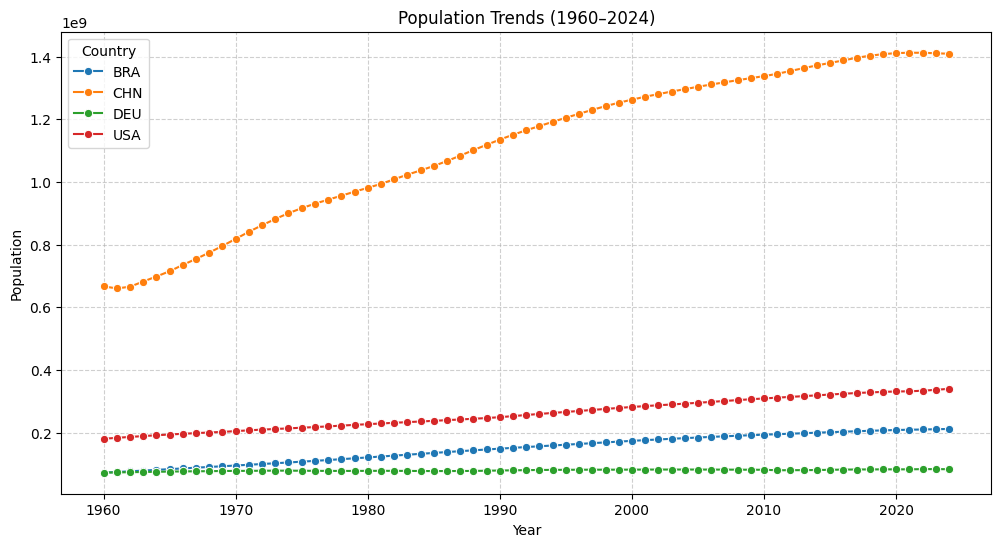

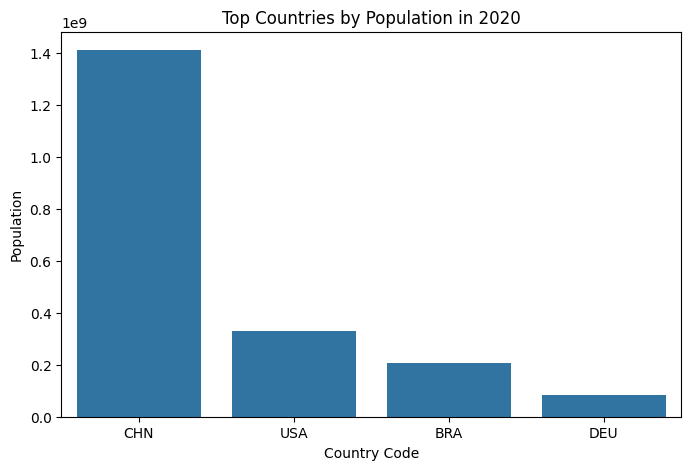

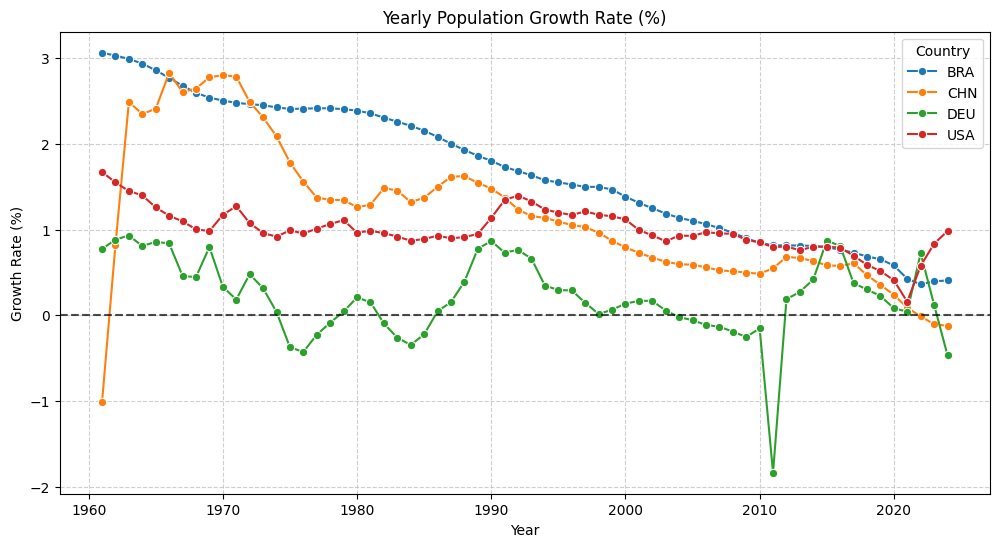

Summary Statistics:

             count          mean           std          min          25%  \
CountryCode                                                                
BRA           65.0  1.497012e+08  4.431442e+07   72388126.0  110213349.0   
CHN           65.0  1.113738e+09  2.406213e+08  660330000.0  930685000.0   
DEU           65.0  7.985573e+07  2.705049e+06   72814900.0   78128282.0   
USA           65.0  2.601787e+08  4.854409e+07  180671000.0  218035000.0   

                      50%           75%           max  
CountryCode                                            
BRA          1.542751e+08  1.903673e+08  2.119986e+08  
CHN          1.164970e+09  1.324655e+09  1.412360e+09  
DEU          8.027498e+07  8.221151e+07  8.390192e+07  
USA          2.565140e+08  3.040940e+08  3.401110e+08  


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df['Year'] = pd.to_numeric(df['Year'])

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Population', hue='CountryCode', marker='o')
plt.title("Population Trends (1960–2024)")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend(title="Country")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

year_to_check = 2020
top_countries = (
    df[df['Year'] == year_to_check]
    .sort_values('Population', ascending=False)
)

plt.figure(figsize=(8, 5))
sns.barplot(data=top_countries, x='CountryCode', y='Population')
plt.title(f"Top Countries by Population in {year_to_check}")
plt.xlabel("Country Code")
plt.ylabel("Population")
plt.show()

df_sorted = df.sort_values(['CountryCode', 'Year'])
df_sorted['GrowthRate'] = df_sorted.groupby('CountryCode')['Population'].pct_change() * 100

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_sorted, x='Year', y='GrowthRate', hue='CountryCode', marker='o')
plt.title("Yearly Population Growth Rate (%)")
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.axhline(0, color='black', linestyle='--', alpha=0.7)
plt.legend(title="Country")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("Summary Statistics:\n")
print(df.groupby("CountryCode")['Population'].describe())

### 3.2 Now lets use the seaborn library to create a heatmap showing the relation between row Country Code and row Year and the changing factor being row Population indicating the population affect in contrast with the row Year and row Country code indicating the level of affect on the population of each country over the years

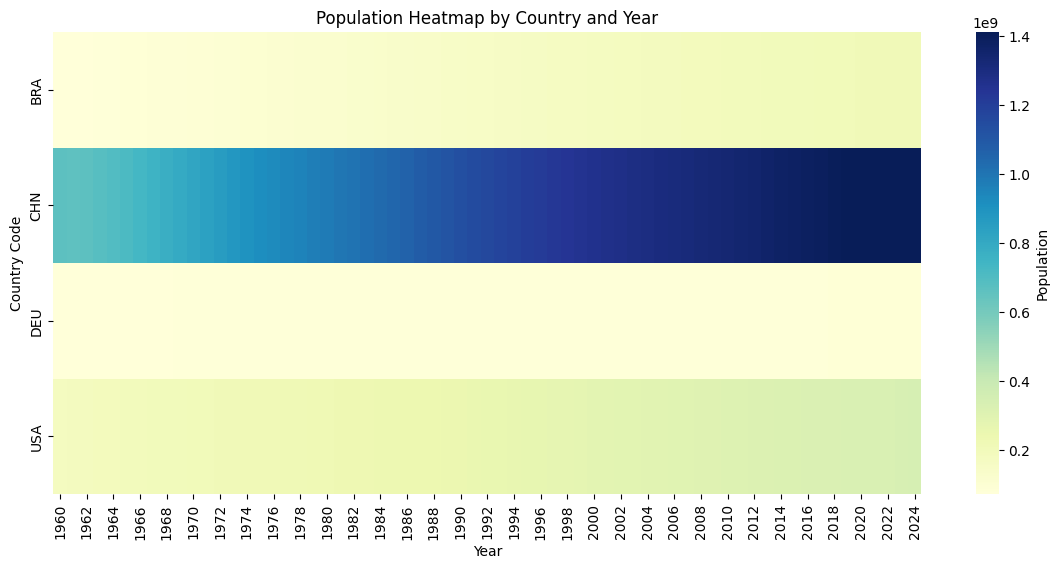

In [30]:
pivot_df = df.pivot(index='CountryCode', columns='Year', values='Population')

plt.figure(figsize=(14, 6))
sns.heatmap(pivot_df, cmap='YlGnBu', annot=False, cbar_kws={'label': 'Population'})
plt.title("Population Heatmap by Country and Year")
plt.xlabel("Year")
plt.ylabel("Country Code")
plt.show()


# 4. Data split for training the model

### 4.1 The model will forecast the population hence the row Population being the target data that the model has to predict

In [31]:
X = df.drop(columns=['Population'])
Y = df['Population']

print(X)
print(Y)

    CountryCode  Year IndicatorCode      IndicatorName
0           BRA  2024   SP.POP.TOTL  Population, total
1           BRA  2023   SP.POP.TOTL  Population, total
2           BRA  2022   SP.POP.TOTL  Population, total
3           BRA  2021   SP.POP.TOTL  Population, total
4           BRA  2020   SP.POP.TOTL  Population, total
..          ...   ...           ...                ...
255         USA  1964   SP.POP.TOTL  Population, total
256         USA  1963   SP.POP.TOTL  Population, total
257         USA  1962   SP.POP.TOTL  Population, total
258         USA  1961   SP.POP.TOTL  Population, total
259         USA  1960   SP.POP.TOTL  Population, total

[260 rows x 4 columns]
0      211998573
1      211140729
2      210306415
3      209550294
4      208660842
         ...    
255    191889000
256    189242000
257    186538000
258    183691000
259    180671000
Name: Population, Length: 260, dtype: int64


### 4.2 Lets further drop IndicatorCode and IndicatorName as they are constant and do not add much precedence for the relations between the rows

In [32]:
X = X.drop(columns=['IndicatorCode', 'IndicatorName'])


In [33]:
df['Population'].values

array([ 211998573,  211140729,  210306415,  209550294,  208660842,
        207455459,  206107261,  204703445,  203218114,  201675532,
        200085127,  198478299,  196876111,  195284734,  193701929,
        192079951,  190367302,  188552320,  186653106,  184688101,
        182675143,  180622688,  178503484,  176301203,  174018282,
        171641543,  169159655,  166661659,  164202549,  161735073,
        159265006,  156794577,  154275079,  151724256,  149143223,
        146502972,  143826357,  141104944,  138336370,  135515595,
        132658864,  129790077,  126923155,  124063109,  121207461,
        118380821,  115600942,  112875292,  110213349,  107619565,
        105089675,  102600976,  100146797,   97739273,   95375651,
         93045777,   90741240,   88446124,   86139359,   83817583,
         81488595,   79164235,   76865323,   74605447,   72388126,
       1408975000, 1410710000, 1412175000, 1412360000, 1411100000,
       1407745000, 1402760000, 1396215000, 1387790000, 1379860

### 4.3 Now lets train the model by training it seperately for three rows as one row follows a more exponential curve needing a model which deals with exponentiality

### lets scale the row Population to the less values as it is astronomically 

BRA → MAE: 0.39M, RMSE: 0.45M, R²: 0.999896, MAPE: 0.28%
CHN → MAE: 6.87M, RMSE: 8.22M, R²: 0.998814, MAPE: 0.70%
DEU → MAE: 0.85M, RMSE: 1.00M, R²: 0.860268, MAPE: 1.07%
USA → MAE: 1.41M, RMSE: 1.68M, R²: 0.998788, MAPE: 0.58%


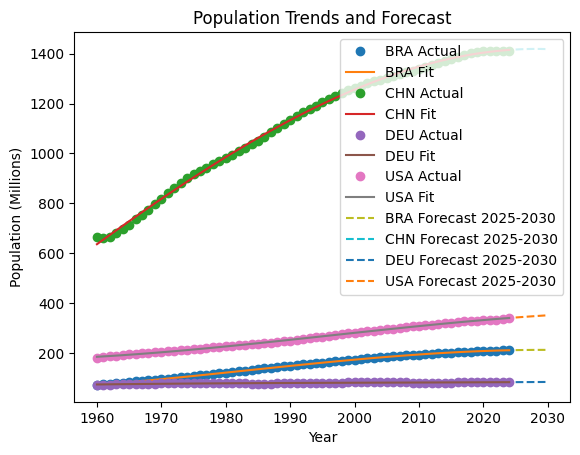

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

future_years = np.arange(2025, 2031).reshape(-1,1)
forecasts = {}

for country in X['CountryCode'].unique():
    country_df = df[df['CountryCode']==country]
    X_country = country_df[['Year']].values
    y_country = country_df['Population'].values
    
    # Scale population to millions
    y_country_mil = y_country / 1_000_000
    
    # Polynomial regression pipeline
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=3)),
        ('lr', LinearRegression())
    ])
    
    # Fit on scaled population
    model.fit(X_country, y_country_mil)
    
    # Predict on historical data
    y_pred_mil = model.predict(X_country)
    
    # ---------- Metrics on historical fit ----------
    mae = mean_absolute_error(y_country_mil, y_pred_mil)
    rmse = np.sqrt(mean_squared_error(y_country_mil, y_pred_mil))
    r2 = r2_score(y_country_mil, y_pred_mil)
    mape = np.mean(np.abs((y_country_mil - y_pred_mil)/y_country_mil))*100
    
    print(f"{country} → MAE: {mae:.2f}M, RMSE: {rmse:.2f}M, R²: {r2:.6f}, MAPE: {mape:.2f}%")
    
    # ---------- Forecast future years ----------
    forecasts[country] = model.predict(future_years)
    
    # Plot historical and fit
    plt.plot(X_country, y_country_mil, 'o', label=f'{country} Actual')
    plt.plot(X_country, y_pred_mil, '-', label=f'{country} Fit')

# Plot forecasts
for i, country in enumerate(X['CountryCode'].unique()):
    plt.plot(future_years, forecasts[country], '--', label=f'{country} Forecast 2025-2030')

plt.xlabel('Year')
plt.ylabel('Population (Millions)')
plt.title('Population Trends and Forecast')
plt.legend()
plt.show()


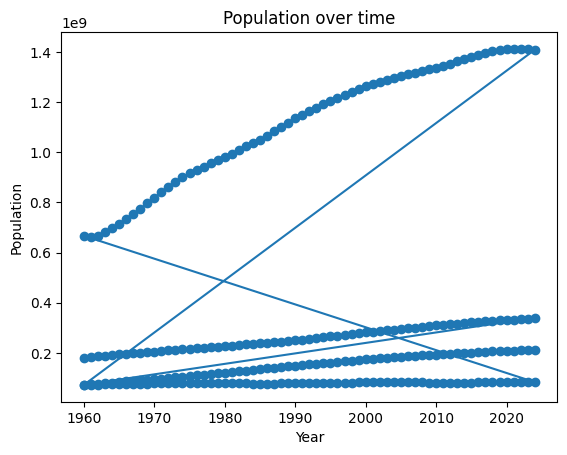

In [35]:
import matplotlib.pyplot as plt

plt.plot(df['Year'], df['Population'], 'o-')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population over time')
plt.show()

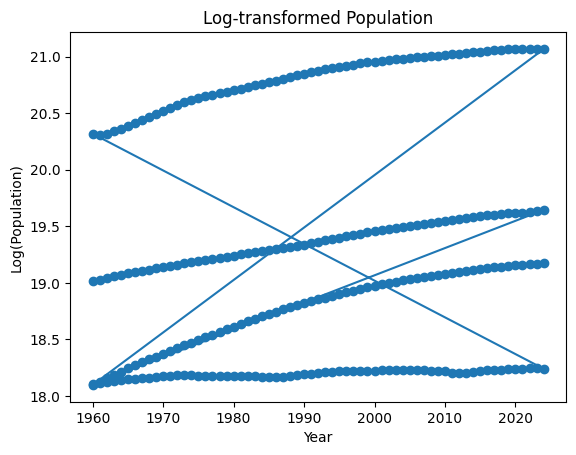

In [36]:
import numpy as np

plt.plot(df['Year'], np.log(df['Population']), 'o-')
plt.xlabel('Year')
plt.ylabel('Log(Population)')
plt.title('Log-transformed Population')
plt.show()


## 5. Lets save the model now using joblib!

In [37]:
import joblib

joblib.dump(model, "./model/model.pkl")

model = joblib.load("./model/model.pkl")
